**Informasi Mahasiswa**
Nama: Fachri Rozan

NPM : 2108107010017

**Jenis Dataset**

Dataset merupakan prediksi obesitas dari kaggle https://www.kaggle.com/datasets/mrsimple07/obesity-prediction

Adapun Atributnya adalah:
- Age: The age of the individual, expressed in years.
- Gender: The gender of the individual, categorized as male or female.
- Height: The height of the individual, typically measured in centimeters or inches.
- Weight: The weight of the individual, typically measured in kilograms or pounds.
- BMI: A calculated metric derived from the individual's weight and height
- PhysicalActivityLevel: This variable quantifies the individual's level of physical activity
- ObesityCategory: Categorization of individuals based on their BMI into different obesity categories

**Studi Kasus**

Pada Kasus ini melihat bagaimana cara mengkategorikan tingkat obesitas dengan menggunakan berat badan, tinggi, badan, level aktivitas, dan BMI. Untuk mengkategorikan hal ini, maka akan dibentuk model menggunakan SVM

**IMPORT LIBRARY**

In [2]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


**Baca data**

In [3]:
data = pd.read_csv("obesity_data.csv")
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


**Preprocessing Data**

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode the outcome column such that 1 means diabetes and 0 means no diabetes
label_encoder = LabelEncoder()
data['ObesityCategory'] = label_encoder.fit_transform(data['ObesityCategory'])

In [34]:
selected_columns = ['Height', 'Weight', 'BMI', 'PhysicalActivityLevel', 'ObesityCategory']
data_selected = data[selected_columns]
data_selected.head()

,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,173.575262,71.982051,23.891783,4,0
1,164.127306,89.959256,33.395209,2,1
2,168.072202,72.930629,25.817737,4,2
3,168.459633,84.886912,29.912247,3,2
4,183.568568,69.038945,20.487903,3,0


In [35]:
# Misalkan Anda memiliki DataFrame 'df' dan kolom 'ObesityCategory'
unique_values = data['ObesityCategory'].unique()
print(unique_values)

[0 1 2 3]


In [36]:
# Menghitung jumlah nilai NaN dalam setiap kolom
nan_counts = data_selected.isna().sum()

# Menampilkan jumlah nilai NaN dalam setiap kolom
print(nan_counts)


Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


**Membangun Model dan Visualisasinya**

1. MELIHAT HUBUNGAN TINGGI BADAN DENGAN BERAT BADAN DALAM MENGKATEGORIKAN TINGKAT OBESITAS

(750, 2) (250, 2)
Confusion Matrix:
 [[99  0  0  0]
 [ 0 46  1  0]
 [ 1  1 73  0]
 [ 1  0  0 28]]


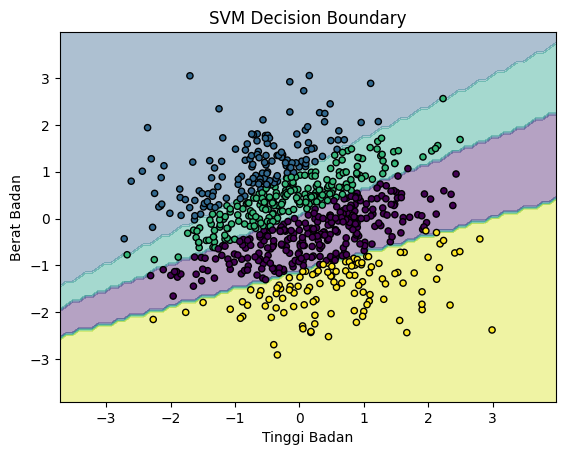

In [37]:
# Load your data into 'data_selected'
# Replace this with your actual data loading procedure

# Separate features (X) and target variable (y)
X = data_selected[['Height', 'Weight']].values  
y = data_selected['ObesityCategory'].values  

# Feature scaling (recommended for SVM)
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Ensure X has the correct shape
print(X_train.shape, X_test.shape)  # This line will print the shapes of X_train and X_test

# Train the SVM model (modify 'kernel' for non-linear models)
classifier = SVC(kernel='linear', random_state=0)

# Train the model on the training data
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the SVM decision boundary (for 2D features only)
# We'll plot the decision boundary based on the first two features
X_train_2d = X_train[:, :2]  # Selecting the first two features for visualization
X_test_2d = X_test[:, :2]

# Create a meshgrid to plot decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on meshgrid points
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Tinggi Badan')
plt.ylabel('Berat Badan')
plt.title('SVM Decision Boundary')
plt.show()


2. MELIHAT HUBUNGAN BMI DENGAN BADAN DALAM MENGKATEGORIKAN TINGKAT OBESITAS

(750, 2) (250, 2)
Confusion Matrix:
 [[97  0  1  1]
 [ 0 47  0  0]
 [ 3  0 72  0]
 [ 1  0  0 28]]


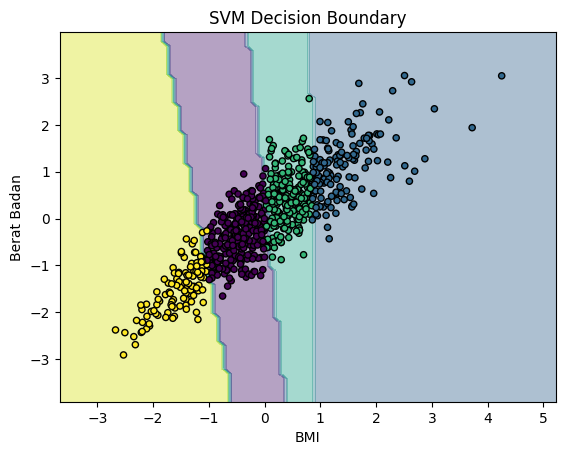

In [43]:
# Separate features (X) and target variable (y)
X = data_selected[['BMI', 'Weight']].values  
y = data_selected['ObesityCategory'].values  

# Feature scaling (recommended for SVM)
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Ensure X has the correct shape
print(X_train.shape, X_test.shape)  # This line will print the shapes of X_train and X_test

# Train the SVM model (modify 'kernel' for non-linear models)
classifier = SVC(kernel='linear', random_state=0)

# Train the model on the training data
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the SVM decision boundary (for 2D features only)
# We'll plot the decision boundary based on the first two features
X_train_2d = X_train[:, :2]  # Selecting the first two features for visualization
X_test_2d = X_test[:, :2]

# Create a meshgrid to plot decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on meshgrid points
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('BMI')
plt.ylabel('Berat Badan')
plt.title('SVM Decision Boundary')
plt.show()


3. MELIHAT HUBUNGAN TINGKAT AKTIVITAS FISIK DENGAN BERAT BADAN DALAM MENGKATEGORIKAN TINGKAT OBESITAS

(750, 2) (250, 2)
Confusion Matrix:
 [[79  0 13  7]
 [ 2 25 20  0]
 [23  8 43  1]
 [ 4  0  0 25]]


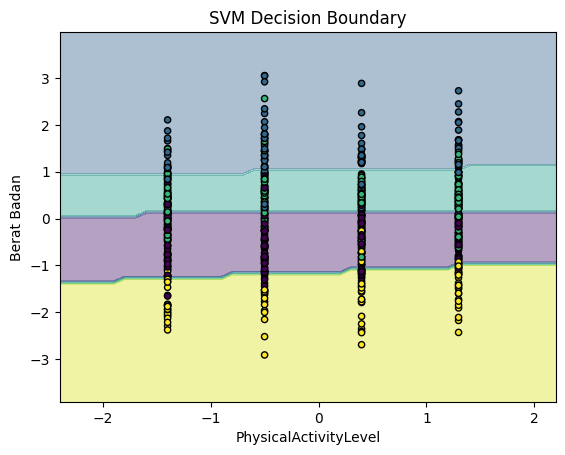

In [42]:
# Separate features (X) and target variable (y)
X = data_selected[['PhysicalActivityLevel', 'Weight']].values  
y = data_selected['ObesityCategory'].values  

# Feature scaling (recommended for SVM)
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Ensure X has the correct shape
print(X_train.shape, X_test.shape)  # This line will print the shapes of X_train and X_test

# Train the SVM model (modify 'kernel' for non-linear models)
classifier = SVC(kernel='linear', random_state=0)

# Train the model on the training data
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the SVM decision boundary (for 2D features only)
# We'll plot the decision boundary based on the first two features
X_train_2d = X_train[:, :2]  # Selecting the first two features for visualization
X_test_2d = X_test[:, :2]

# Create a meshgrid to plot decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on meshgrid points
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('PhysicalActivityLevel')
plt.ylabel('Berat Badan')
plt.title('SVM Decision Boundary')
plt.show()
